In [26]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [27]:
# Importing the dataset
dataset = pd.read_csv('prima_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

In [28]:
#Printing the first five examples
dataset.head()

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
#Checking if the data contains any null/vacant values
dataset.isnull().sum()

num_preg          0
glucose_conc      0
diastolic_bp      0
skin_thickness    0
insulin           0
bmi               0
diab_pred         0
age               0
diabetes          0
dtype: int64

In [30]:
def plot_corr(dataset, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        dataset: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                
    """

    corr = dataset.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


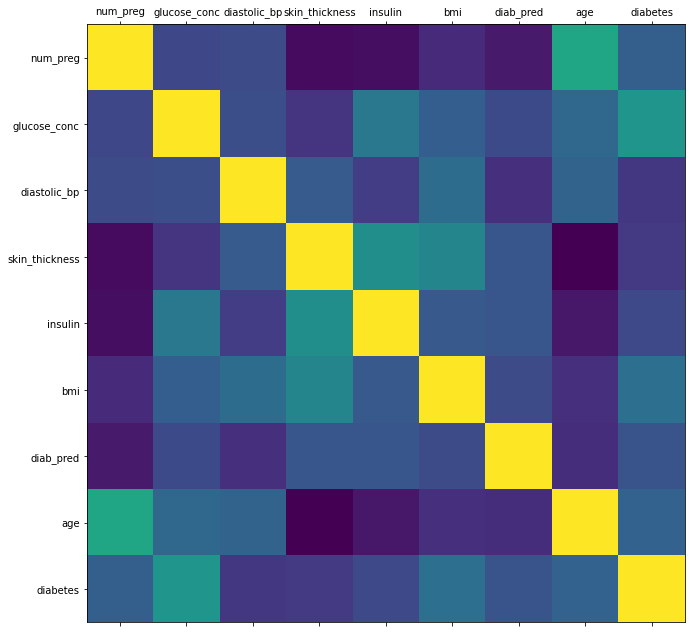

In [31]:
plot_corr(dataset,11)

In [32]:
dataset.corr()

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Because there are no two elements having a higher coorelation, we can keep the features

In [33]:
num_obs = len(dataset)
num_true = len(dataset.loc[dataset['diabetes'] == 1])
num_false = len(dataset.loc[dataset['diabetes'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


In [34]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Check to ensure we have done the correct splitting

In [35]:
trainval = (1.0 * len(X_train)) / (1.0 * len(dataset.index))
testval = (1.0 * len(X_test)) / (1.0 * len(dataset.index))
print("{0:0.2f}% in training set".format(trainval * 100))
print("{0:0.2f}% in test set".format(testval * 100))

79.95% in training set
20.05% in test set


In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
# Parameter evaluation with GSC validation
gbe = GradientBoostingClassifier(random_state=42)
parameters={'learning_rate': [0.05, 0.1, 0.5],
            'max_features': [0.5, 1],
            'max_depth': [3, 4, 5]
}
gridsearch=GridSearchCV(gbe, parameters, cv=100, scoring='roc_auc')
gridsearch.fit(X, y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'learning_rate': 0.05, 'max_depth': 3, 'max_features': 0.5}
0.841


In [38]:
# Adjusting development threshold
gbi = GradientBoostingClassifier(learning_rate=0.05, max_depth=3,
                                 max_features=0.5,
                                 random_state=42)
X_train,X_test,y_train, y_test = train_test_split(X, y, random_state=42)
gbi.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbi.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbi.score(X_test, y_test)))

Accuracy on training set: 0.882
Accuracy on test set: 0.750


In [39]:
# Storing the prediction
y_pred = gbi.predict_proba(X_test)[:,1]

In [40]:
# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())

print('TN - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

TN - True Negative 96
FP - False Positive 27
FN - False Negative 21
TP - True Positive 48
Accuracy Rate: 0.75
Misclassification Rate: 0.25


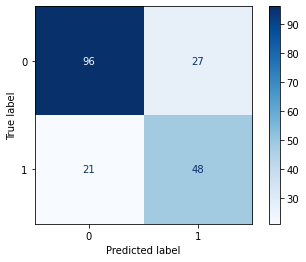

In [41]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(gbi, X_test, y_test,cmap=plt.cm.Blues)
plt.show()

In [42]:
import pickle
pickle.dump(gbi, open("diabetes_prediction.pickle", "wb"))

In [43]:
from tkinter import*
from PIL import ImageTk, Image

In [49]:
root=Tk()

root.geometry("900x900")

root.configure(background="light blue")
def gbimodel(num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age):
    loaded_model = pickle.load(open("diabetes_prediction.pickle", "rb"))
    y_pred = loaded_model.predict([[num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age]])  #order important
    if y_pred == [0]:
        notif1.configure(text="The patient does not have diabetes")
    
    else:
        notif1.configure(text="The patient has diabetes")

#Exit App
def exit_app():
    root.destroy()
        
Head1 = Label(root, text="AIS Solutions PVT LTD", font=('Trebuchet MS',30,"bold","underline")).pack(pady = (10,0))

Head2 = Label(root,text="Diabetes Prediction",font=('Helvetica',25,'bold'),relief="solid").pack(pady=(20,0))

Head3 = Label(root,text="Please enter the patient information",font=('Helvetica',25,'bold'),relief="solid").pack(pady=(30,0))

num_preg=Label(root,text="Number of Pregnancies",font=('Helvetica',10,'bold'),bg="white",relief="solid",width=40).place(x=40,y=220)
num_preg_input=Entry(root,bd=1,width="30",font=("Arial sans MS",14))
num_preg_input.place(x=440,y=220)

glucose_conc=Label(root,text="Glucose Concentration (50-200 mg/dL)",font=('Helvetica',10,'bold'),bg="white",relief="solid",width=40).place(x=40,y=260)
glucose_conc_input=Entry(root,bd=1,width="30",font=("Arial sans MS",14))
glucose_conc_input.place(x=440,y=260)

diastolic_bp=Label(root,text="Blood Pressure (40-150 mm Hg)",font=('Helvetica',10,'bold'),bg="white",relief="solid",width=40).place(x=40,y=320)
diastolic_bp_input=Entry(root,bd=1,width="30",font=("Arial sans MS",14))
diastolic_bp_input.place(x=440,y=320)

skin_thickness=Label(root,text="Skin Thickness (10-90 mu/m^2)",font=('Helvetica',10,'bold'),bg="white",relief="solid",width=40).place(x=40,y=360)
skin_thickness_input=Entry(root,bd=1,width="30",font=("Arial sans MS",14))
skin_thickness_input.place(x=440,y=360)

insulin=Label(root,text="Insulin (0-1153 pmol/L)",font=('Helvetica',10,'bold'),bg="white",relief="solid",width=40).place(x=40,y=400)
insulin_input=Entry(root,bd=1,width="30",font=("Arial sans MS",14))
insulin_input.place(x=440,y=400)

bmi=Label(root,text="BMI (17-60 kg/m^2)",font=('Helvetica',10,'bold'),bg="white",relief="solid",width=40).place(x=40,y=440)
bmi_input=Entry(root,bd=1,width="30",font=("Arial sans MS",14))
bmi_input.place(x=440,y=440)

diab_pred=Label(root,text="DiabetesPedigreeFunction (0.000-1.200)",font=('Helvetica',10,'bold'),bg="white",relief="solid",width=40).place(x=40,y=480)
diab_pred_input=Entry(root,bd=1,width="30",font=("Arial sans MS",14))
diab_pred_input.place(x=440,y=480)

age=Label(root,text="Age",font=('Helvetica',10,'bold'),bg="white",relief="solid",width=40).place(x=40,y=520)
age_input=Entry(root,bd=1,width="30",font=("Arial sans MS",14))
age_input.place(x=440,y=520)


but1 = Button(root,text="Predict",width="50", height="2",command=lambda: gbimodel(num_preg_input.get(),glucose_conc_input.get(),diastolic_bp_input.get(),skin_thickness_input.get(),insulin_input.get(),bmi_input.get(),diab_pred_input.get(),age_input.get()))

button_exit = Button(root, text = "Exit", width="15", height="1", command = exit_app) 

notif1 = Label(root, text="",font=("Arial sans MS",14,"bold"))

but1.pack(pady=(400,0))

button_exit.pack(pady=(100,0))
notif1.place(x=300,y=690)
root.resizable(0,0)
root.mainloop()